In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 4096
FOV = 10e-3
dx = FOV/N

E0 = 9500

beam_params = {
    'photonEnergy': E0-1,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 5,
    'scaleFactor': 20,
    'z_source': 630
}

In [98]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286, orientation=2)

alphaAsym = -5*np.pi/180

# slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)
# entrance_slit = optics.Slit('entrance', z=989, x_width=.5e-3, y_width=.5e-3)

crystal1 = optics.Crystal('c1', hkl=[2,2,0], length=1e-2, width=10e-3, z=990, E0=E0,
                          alphaAsym=alphaAsym, orientation=0,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.012, E0=E0,alphaAsym=alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.112, E0=E0,alphaAsym=-alphaAsym, 
                          orientation=0, asym_type='emergence',pol='p')

IP = optics.PPM('IP', FOV=50e-6, z=991.08, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=4e-3,z=crystal1.z - .05, N=256)

# YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=4e-3,z=crystal1.z + .05, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices = [mr1l0,mr2l0,upstream_YAG, downstream_YAG, crystal1]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

FWHM in x: 359.9607834325503 microns
FWHM in y: 359.9607834325503 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415473519954135
5.415473519954135
b 0.61
b 0.61
b 1.64
after mr1l0: 0.00
after mr2l0: 0.00
after c1: 0.69


mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: -0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: -0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 966.81
zy: 360.00
azimuth 693.56 mrad
drift4
delta z: -0.04
zx: 966.88
zy: 360.07
azimuth 693.56 mrad
YAG2
zx: 966.88
zy: 360.07
azimuth 693.56 mrad


<IPython.core.display.Javascript object>


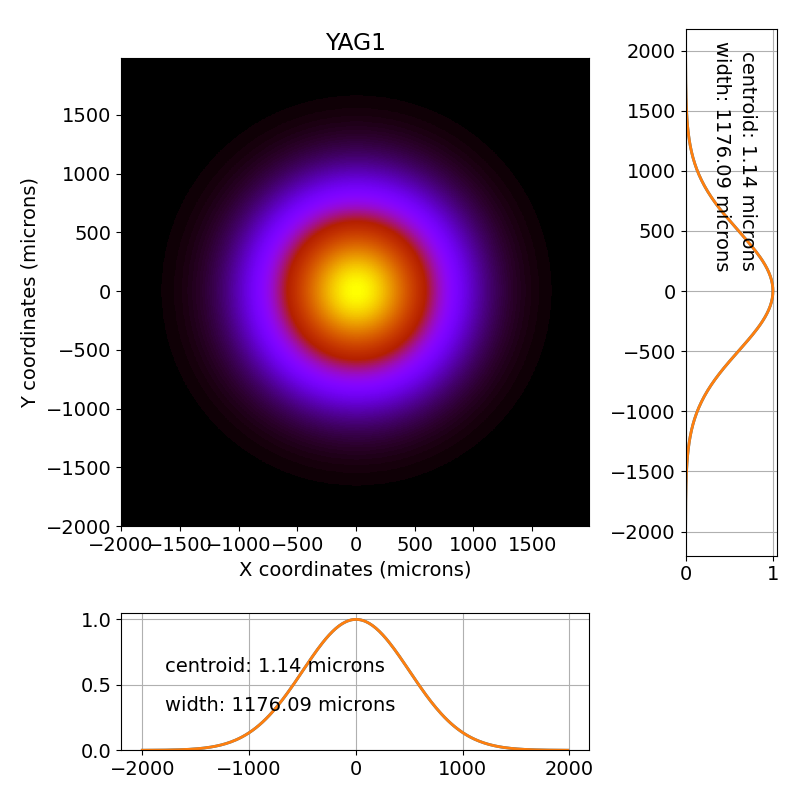

<IPython.core.display.Javascript object>


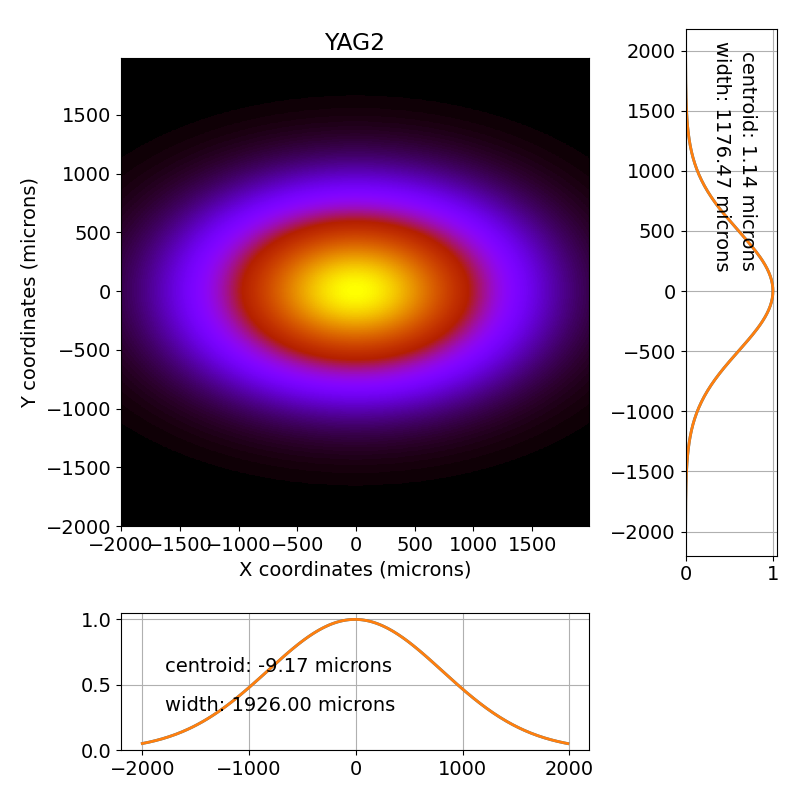

<IPython.core.display.Javascript object>


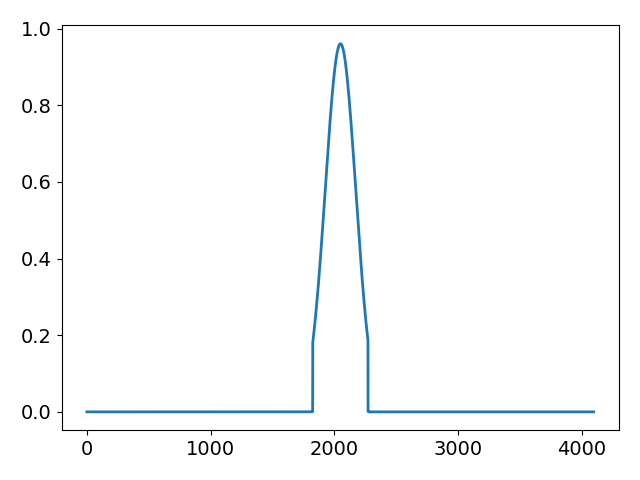

In [99]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
# XPP.IP.view_beam()
XPP.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [100]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=100, time_window=3000)

In [101]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG1','YAG2'])

FWHM in x: 359.9642986259116 microns
FWHM in y: 359.9642986259116 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415420507542932
5.415420507542932
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 966.82
zy: 360.00
azimuth 693.56 mrad
drift4
delta z: 0.07
zx: 966.89
zy: 360.07
azimuth 693.56 mrad
YAG2
zx: 966.89
zy: 360.07
azimuth 693.56 mrad
FWHM in x: 359.96424536489195 microns
FWHM in y: 359.96424536489195 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.4154213107612845
5.4154213107612845
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx

FWHM in x: 359.96344645149674 microns
FWHM in y: 359.96344645149674 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415433359036558
5.415433359036558
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 966.82
zy: 360.00
azimuth 693.56 mrad
drift4
delta z: -0.00
zx: 966.88
zy: 360.07
azimuth 693.56 mrad
YAG2
zx: 966.88
zy: 360.07
azimuth 693.56 mrad
FWHM in x: 359.96339319073013 microns
FWHM in y: 359.96339319073013 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415434162254909
5.415434162254909
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
z

zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 966.82
zy: 360.00
azimuth 693.56 mrad
drift4
delta z: -0.00
zx: 966.88
zy: 360.07
azimuth 693.56 mrad
YAG2
zx: 966.88
zy: 360.07
azimuth 693.56 mrad
FWHM in x: 359.96254102061795 microns
FWHM in y: 359.96254102061795 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415447013748533
5.415447013748533
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 966.82
zy: 360.00
azimuth 693.56 mrad
drift4
delta z: -0.00
zx: 966.88
zy: 360.07
az

zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 966.82
zy: 360.00
azimuth 693.56 mrad
drift4
delta z: -0.00
zx: 966.88
zy: 360.07
azimuth 693.56 mrad
YAG2
zx: 966.88
zy: 360.07
azimuth 693.56 mrad
FWHM in x: 359.96174211481537 microns
FWHM in y: 359.96174211481537 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415459062023808
5.415459062023808
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 966.82
zy: 360.00
azimuth 693.56 mrad
drift4
delta z: -0.00
zx: 966.88
zy: 360.07
azimuth 693.56 mrad
YAG2
zx: 966.88
zy: 360.07
azimuth 693.56 mrad
FWHM in x: 359.9616888545551 microns
FWHM i

zx: 966.88
zy: 360.07
azimuth 693.56 mrad
YAG2
zx: 966.88
zy: 360.07
azimuth 693.56 mrad
FWHM in x: 359.96088995254894 microns
FWHM in y: 359.96088995254894 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415471913517432
5.415471913517432
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.29
azimuth 4.20 mrad
mr2l0
zx: 117.29
zy: 117.29
azimuth -0.00 mrad
drift2
delta z: 0.00
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
YAG1
zx: 359.95
zy: 359.95
azimuth -0.00 mrad
drift3
delta z: 0.00
zx: 360.00
zy: 360.00
azimuth -0.00 mrad
c1
zx: 966.82
zy: 360.00
azimuth 693.56 mrad
drift4
delta z: -0.00
zx: 966.88
zy: 360.07
azimuth 693.56 mrad
YAG2
zx: 966.88
zy: 360.07
azimuth 693.56 mrad
FWHM in x: 359.96083669254176 microns
FWHM in y: 359.96083669254176 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415472716735783
5.415472716735783
mr1l0
zx: 110.00
zy: 110.00
azimuth 4.20 mrad
drift1
delta z: 0.00
zx: 117.29
zy: 117.2

<IPython.core.display.Javascript object>


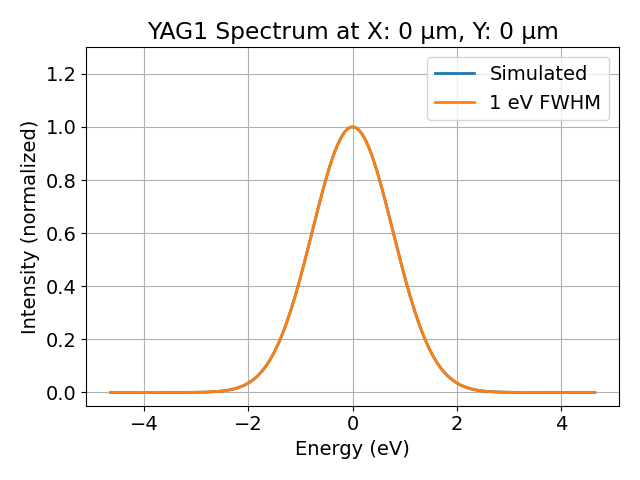

<IPython.core.display.Javascript object>


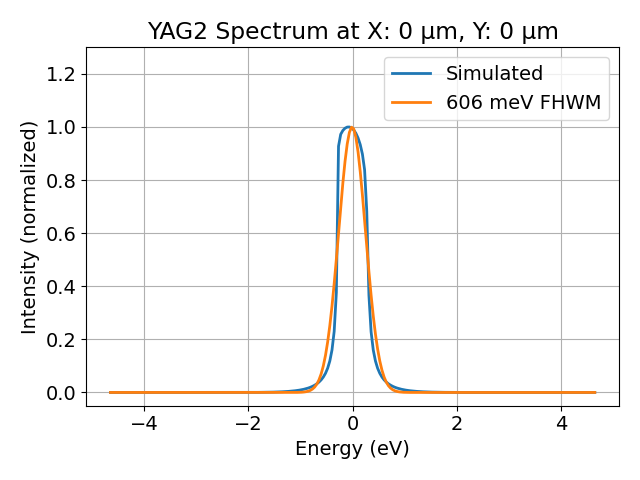

<IPython.core.display.Javascript object>


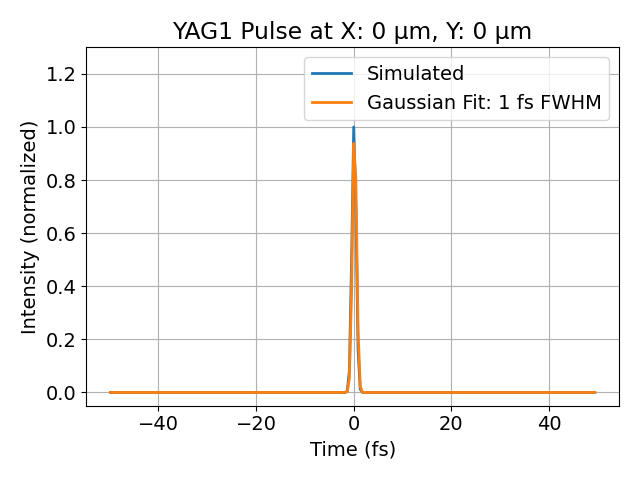

<IPython.core.display.Javascript object>


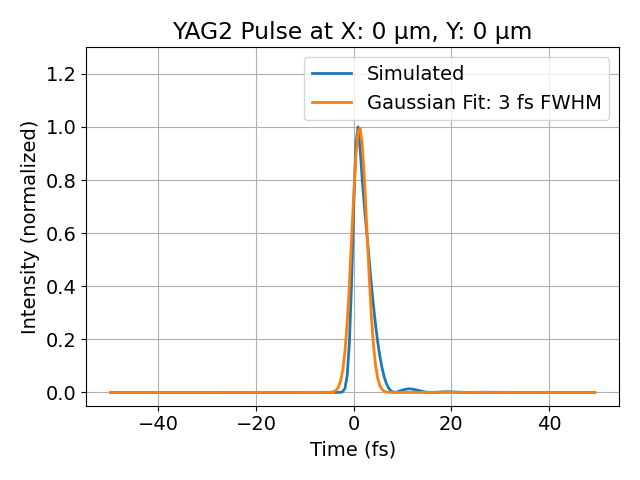

In [16]:
figure_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/split_and_delay/figures/'
pulse_test.plot_spectrum('YAG1')
plt.savefig(figure_path+'negative_asymmetric_crystal_input_spectrum.png')
pulse_test.plot_spectrum('YAG2')
plt.savefig(figure_path+'negative_asymmetric_crystal_output_spectrum.png')
pulse_test.plot_pulse('YAG1', shift=45)
plt.savefig(figure_path+'negative_asymmetric_crystal_input_pulse.png')
pulse_test.plot_pulse('YAG2', shift=-16)
plt.savefig(figure_path+'negavite_asymmetric_crystal_output_pulse.png')

In [29]:
(547-20)/(564+92)

0.8033536585365854

In [44]:
(850-21)/(1800-10)

0.4631284916201117

<IPython.core.display.Javascript object>


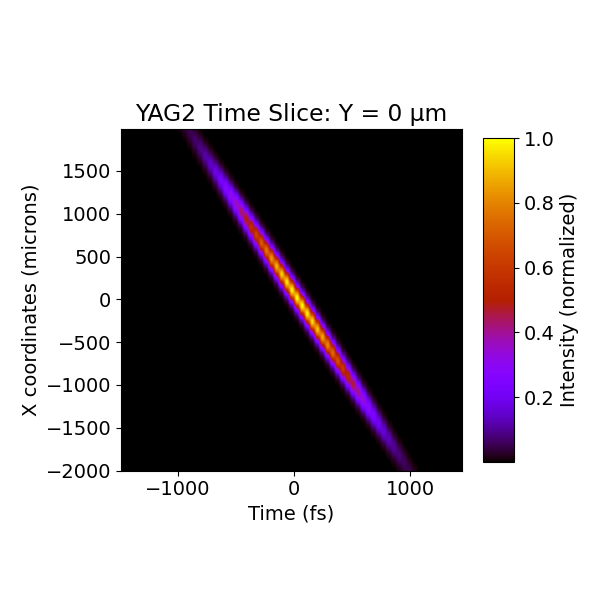

128


<IPython.core.display.Javascript object>


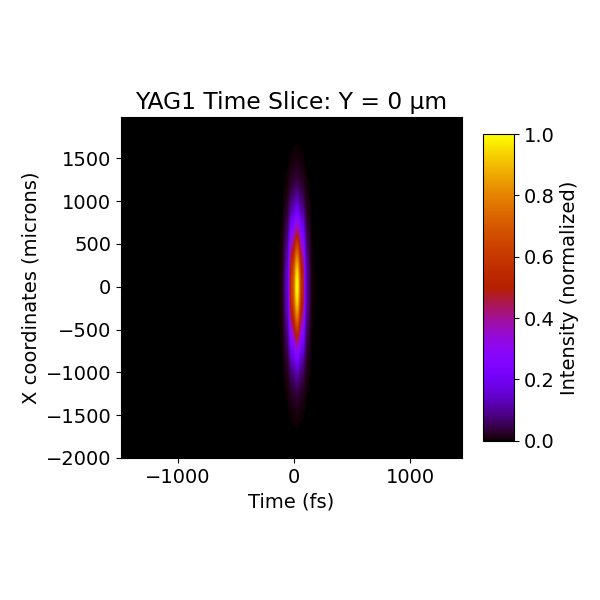

128


In [104]:
figure_path = '/Users/Matt/OneDrive - SLAC National Accelerator Laboratory/Projects/split_and_delay/figures/'
pulse_test.imshow_time_slice('YAG2', shift=-100)
plt.savefig(figure_path+'negative_asymmetric_crystal_time_slice.png')
pulse_test.imshow_time_slice('YAG1', shift=800-464)
# plt.savefig(figure_path+'input_time_slice.png')

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8

In [53]:
print(crystal1.d/np.sin(5*np.pi/180))

2.2030307131721484e-09


In [70]:
np.sin(5*np.pi/180)*b1.lambda0/np.sin(crystal1.alpha)/crystal1.d/3e8/1.64*1e15/1e6

0.4691959020615095

In [67]:
500e-6/np.sin(crystal1.alpha)/(crystal1.d/np.sin(5*np.pi/180))*b1.lambda0/3e8*1e15/(500*1.64)

0.4691959020615094

In [106]:
delta = 5*np.pi/180
bragg = crystal1.crystal.get_Bragg_angle(9500)
1/np.sin(bragg+delta)/(crystal1.d/np.sin(delta))*b1.lambda0/3e8*1e15/1e6*np.sin(bragg+delta)/np.sin(bragg-delta)

0.7695462089667678

In [52]:
np.sin(5*np.pi/180)/crystal1.d*500e-6/3e8

0.0012407150372395856

In [46]:
np.sin(5*np.pi/180)/crystal1.d*1e6/1e15

0.45392013557545824

In [74]:
crystal1.crystal.get_Bragg_angle(9500)

0.3467647920466031

In [81]:
bragg-delta

0.4340312546463196